In [4]:
import pandas as pd

data = pd.read_csv('FULLDATA.csv')
DF = pd.DataFrame(data=data)
DF.drop('Unnamed: 0',axis=1,inplace=True)
data.drop('Unnamed: 0',axis=1,inplace=True)
DF.drop('DHI',axis=1,inplace=True)
data.drop('DHI',axis=1,inplace=True)
DF.drop('Solar Zenith Angle',axis=1,inplace=True)
data.drop('Solar Zenith Angle',axis=1,inplace=True)
DF.drop(0,axis=0,inplace=True)
data.drop(0,axis=0,inplace=True)
DF

,Month,Day,GHI,Temperature,Surface Albedo,power
1,3,7,259,17.0,40.534535,51.171986
2,3,8,214,18.0,40.534535,51.171986
3,3,9,213,18.0,40.534535,51.171986
4,3,10,259,18.0,40.534535,51.171986
5,3,11,250,20.0,40.534535,51.171986
...,...,...,...,...,...,...
661,12,27,182,9.0,22.000000,50.780389
662,12,28,177,10.0,25.000000,51.184018
663,12,29,174,9.0,30.000000,49.292800
664,12,30,172,9.0,32.000000,49.712401


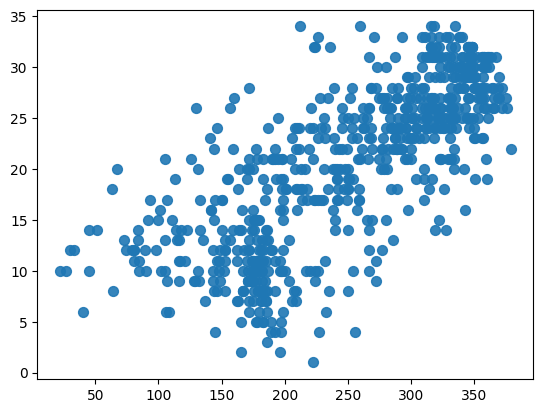

In [5]:
import matplotlib.pyplot as plt
X = data.iloc[:,0:].values
plt.scatter(X[:,2],X[:,3],s=50,alpha=0.9)

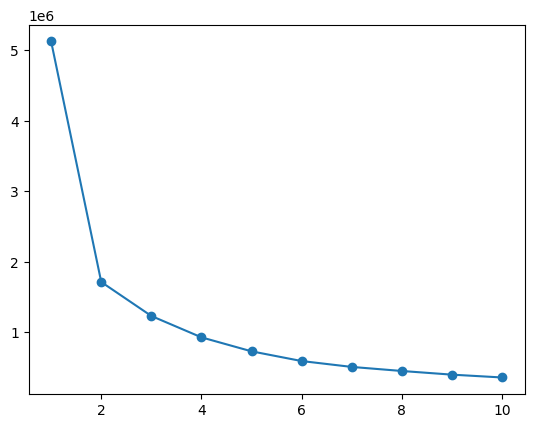

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = list()

for i in range(1,11):
    model = KMeans(n_clusters=i , init= "k-means++",n_init=i)
    model.fit(X)
    wcss.append(model.inertia_)


plt.scatter(range(1,11),wcss)
plt.plot(range(1,11),wcss)
plt.show()

In [7]:
k_means = KMeans(n_clusters=3,init= "k-means++",random_state=42)
y_kmeans = k_means.fit_predict(X)

c:\Users\Top\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


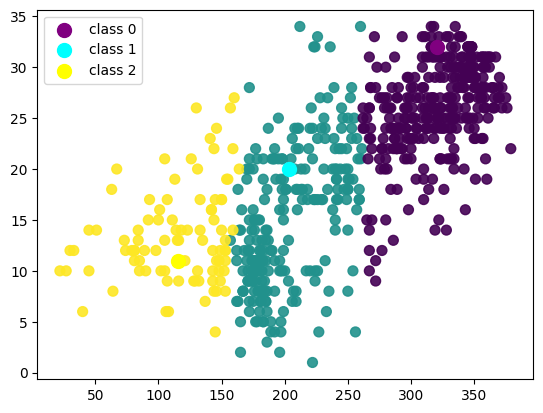

In [8]:
import numpy as np

plt.scatter(X[:,2],X[:,3],c=y_kmeans,s=50,alpha=0.9)
plt.scatter(max(k_means.cluster_centers_[0]),max(k_means.cluster_centers_[0])//10,color='purple',s=100,label='class 0')
plt.scatter(max(k_means.cluster_centers_[1]),max(k_means.cluster_centers_[1])//10,color='cyan',s=100,label='class 1')
plt.scatter(max(k_means.cluster_centers_[2]),max(k_means.cluster_centers_[2])//10,color='yellow',s=100,label='class 2')
plt.legend()
plt.show()

In [9]:
DF["label"] = y_kmeans
DF

,Month,Day,GHI,Temperature,Surface Albedo,power,label
1,3,7,259,17.0,40.534535,51.171986,1
2,3,8,214,18.0,40.534535,51.171986,1
3,3,9,213,18.0,40.534535,51.171986,1
4,3,10,259,18.0,40.534535,51.171986,1
5,3,11,250,20.0,40.534535,51.171986,1
...,...,...,...,...,...,...,...
661,12,27,182,9.0,22.000000,50.780389,1
662,12,28,177,10.0,25.000000,51.184018,1
663,12,29,174,9.0,30.000000,49.292800,1
664,12,30,172,9.0,32.000000,49.712401,1


In [10]:
p0=0
p1=0
p2=0

t0=0
t1=0
t2=0

g0=0
g1=0
g2=0
for i in range(len(DF)):
    if DF.iloc[i,6] == 0:
        p0=p0+DF.iloc[i,5]
        g0=g0+DF.iloc[i,2]
        t0=t0+DF.iloc[i,3]
        
    elif DF.iloc[i,6] == 1:
        p1=p1+DF.iloc[i,5]
        g1=g1+DF.iloc[i,2]
        t1=t1+DF.iloc[i,3]

    elif DF.iloc[i,6] == 2:
        p2=p2+DF.iloc[i,5]
        g2=g2+DF.iloc[i,2]
        t2=t2+DF.iloc[i,3]

print('avg power of label 0: ',p0/len(DF))
print('avg GHI of label 0: ',g0/len(DF))
print('avg Temp of label 0: ',t0/len(DF))
print("\n")
#---------------------------------------
print('avg power of label 1: ',p1/len(DF))
print('avg GHI of label 1: ',g1/len(DF))
print('avg Temp of label 1: ',t1/len(DF))
print("\n")
#---------------------------------------
print('avg power of label 2: ',p2/len(DF))
print('avg GHI of label 2: ',g2/len(DF))
print('avg temp of label 2: ',t2/len(DF))

avg power of label 0:  28.73033985263158
avg GHI of label 0:  158.11278195488723
avg Temp of label 0:  12.851127819548871


avg power of label 1:  18.201774560342304
avg GHI of label 1:  75.0406015037594
avg Temp of label 1:  5.5699248120300755


avg power of label 2:  4.778516740639887
avg GHI of label 2:  15.954887218045112
avg temp of label 2:  1.8646616541353382


class 0 ====> high temp and high GHI = high Power
           
class 1 ====> mid temp and mid GHI = mid Power
           
class 2 ====> low temp and low GHI = low Power

In [11]:
X = DF.iloc[:,:-1].values
Y = DF.iloc[:,-1].values

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

### RandomForestClassifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix

RF = RandomForestClassifier(n_estimators=200).fit(X_train,Y_train)
RF_pred = RF.predict(X_test)
print(accuracy_score(Y_test,RF_pred))

1.0


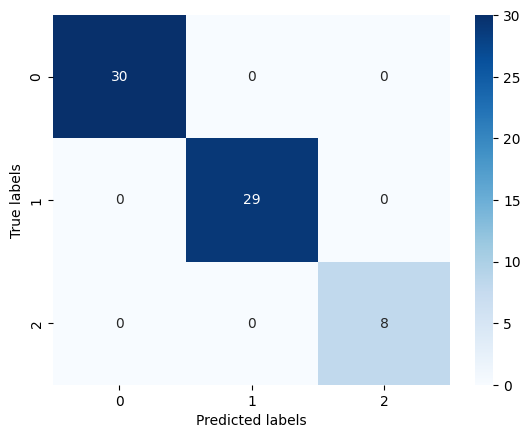

In [14]:
import seaborn as sns
cm = confusion_matrix(Y_test,RF_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix

KN = KNeighborsClassifier(n_neighbors=5).fit(X_train,Y_train)
KN_pred = KN.predict(X_test)
print(accuracy_score(Y_test,KN_pred))

0.9850746268656716


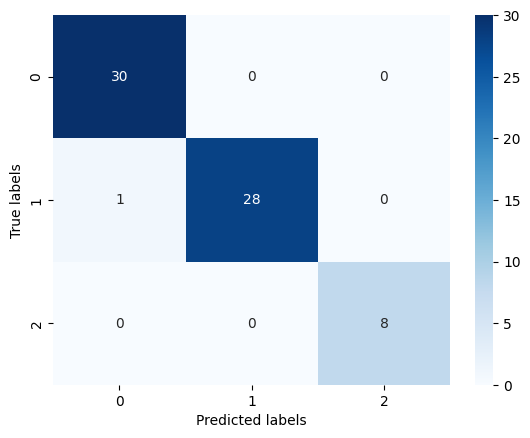

In [16]:
import seaborn as sns
cm = confusion_matrix(Y_test,KN_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### naive_bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score ,confusion_matrix

GB = GaussianNB().fit(X_train,Y_train)
GB_pred = GB.predict(X_test)
print(accuracy_score(Y_test,GB_pred))

0.8955223880597015


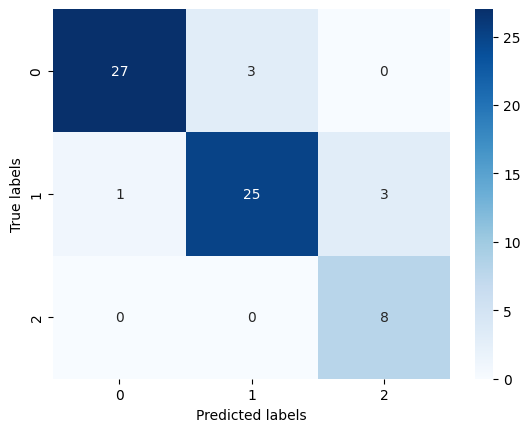

In [18]:
import seaborn as sns
cm = confusion_matrix(Y_test,GB_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()